In [1]:
import numpy as np       #Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv(r"C:\Users\harsh\Downloads\RELIANCE.NS.csv",index_col='Date')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3194 entries, 2010-06-28 to 2023-05-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3188 non-null   float64
 1   High       3188 non-null   float64
 2   Low        3188 non-null   float64
 3   Close      3188 non-null   float64
 4   Adj Close  3188 non-null   float64
 5   Volume     3188 non-null   float64
dtypes: float64(6)
memory usage: 174.7+ KB


In [12]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-28,531.957581,540.873047,527.574097,539.956726,492.728729,14524622.0
2010-06-29,540.377747,540.377747,527.103577,528.713318,482.468689,6559747.0
2010-06-30,525.023315,541.838928,523.785034,539.808167,492.593170,12293253.0
2010-07-01,536.910645,538.074585,528.242798,533.072021,486.446167,6142980.0
2010-07-02,532.948181,536.885864,527.648438,529.456299,483.146698,5052862.0


In [13]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-22,2435.000000,2466.0,2432.350098,2455.000000,2455.000000,3431208.0
2023-05-23,2460.649902,2468.0,2451.449951,2454.550049,2454.550049,2811473.0
2023-05-24,2445.899902,2464.0,2433.449951,2440.250000,2440.250000,3743804.0
2023-05-25,2433.899902,2449.0,2416.050049,2439.949951,2439.949951,5301647.0
2023-05-26,2458.000000,2509.0,2450.750000,2506.500000,2506.500000,5827017.0


In [14]:
df.isnull().sum()

Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

In [15]:
df = df.dropna()

In [16]:
df.shape

(3188, 6)

Text(0.5, 0, 'Date')

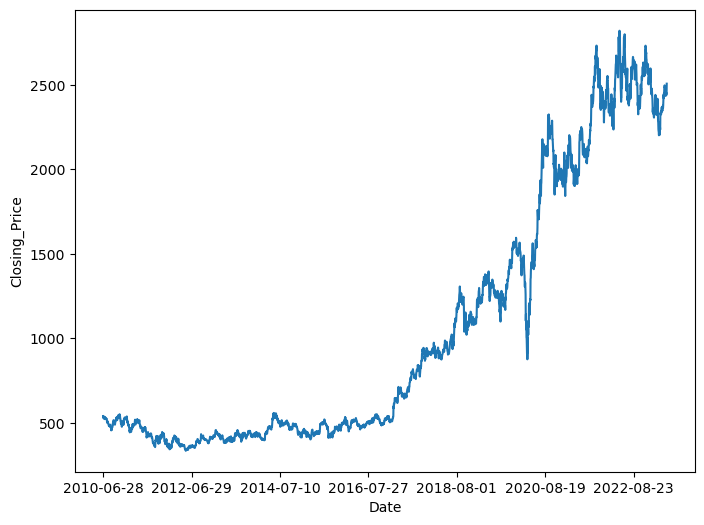

In [21]:
plt.figure(figsize=(8, 6))
df['Close'].plot()
plt.ylabel('Closing_Price')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

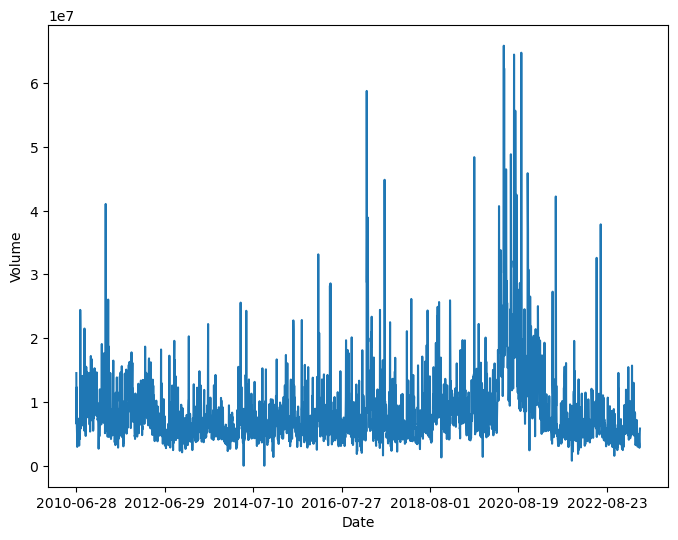

In [22]:
plt.figure(figsize=(8,6))
df['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel('Date')
    

In [24]:
from sklearn.preprocessing import MinMaxScaler
data = df['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [26]:
scaled_data

array([[0.08252843],
       [0.07800387],
       [0.08246864],
       ...,
       [0.84724185],
       [0.8471211 ],
       [0.87390208]])

In [29]:
train_size = int(len(scaled_data) * 0.8)  # Use 80% of the data for training

train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

print(train_size)

2550


In [27]:
train_data.shape

(2550, 1)

In [28]:
test_data.shape

(638, 1)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [31]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i : i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10  # Define the length of input sequences
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


In [32]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=16)


Epoch 1/10
159/159 [==============================] - 2s 3ms/step - loss: 0.0044
Epoch 2/10
159/159 [==============================] - 1s 3ms/step - loss: 1.5528e-04
Epoch 3/10
159/159 [==============================] - 1s 3ms/step - loss: 1.5738e-04
Epoch 4/10
159/159 [==============================] - 1s 3ms/step - loss: 1.4922e-04
Epoch 5/10
159/159 [==============================] - 1s 3ms/step - loss: 1.3800e-04
Epoch 6/10
159/159 [==============================] - 1s 4ms/step - loss: 1.3832e-04
Epoch 7/10
159/159 [==============================] - 0s 3ms/step - loss: 1.3696e-04
Epoch 8/10
159/159 [==============================] - 1s 3ms/step - loss: 1.4488e-04
Epoch 9/10
159/159 [==============================] - 1s 3ms/step - loss: 1.2298e-04
Epoch 10/10
159/159 [==============================] - 0s 3ms/step - loss: 1.2154e-04


In [33]:
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)


20/20 [==============================] - 0s 2ms/step


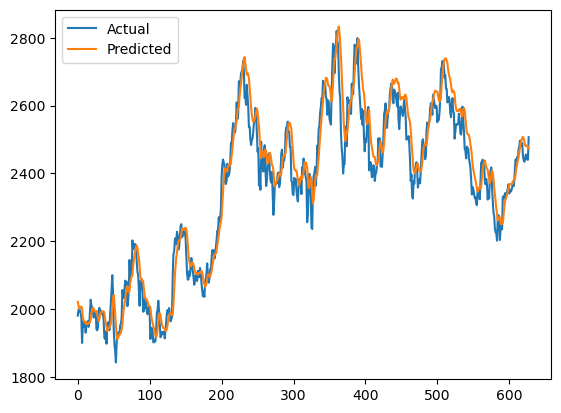

In [34]:
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()


In [35]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, predictions)

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)

print('MAPE:', mape)
print('RMSE:', rmse)


MAPE: 0.01967995626422569
RMSE: 60.39718020644735
